In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import deepchem as dc
from tqdm import tqdm

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/steshin/miniconda3/envs/lohi_benchmark/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
import sys
sys.path.append('../../code')

from splits import get_nearest_mols

# DRD2-Hi

In [3]:
train = pd.read_csv('../../data/hi/drd2/train_1.csv')
test = pd.read_csv('../../data/hi/drd2/test_1.csv')

In [4]:
nearest_dist, nearest_idx = get_nearest_mols(train['smiles'], test['smiles'], return_idx=True)

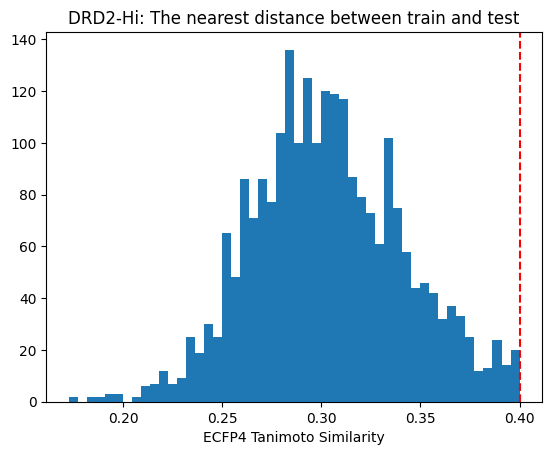

In [6]:
plt.hist(nearest_dist, bins=50)
plt.axvline(x=0.4, color = 'r', ls='--')
plt.title('DRD2-Hi: The nearest distance between train and test')
plt.xlabel('ECFP4 Tanimoto Similarity')
plt.savefig('lohi_eda/drd2_hi.png')

In [10]:
similar_idx = []
for i, sim in enumerate(nearest_dist):
    if sim >= 0.40:
        similar_idx.append(i)
similar_idx

[45, 123, 625, 977, 978, 1221, 1725, 1877, 2223, 2304]

In [11]:
# Looking for the most similar molecules
test_idx = similar_idx[0]
train_idx = nearest_idx[test_idx]

In [12]:
train_similar = train['smiles'][train_idx]
test_similar = test['smiles'][test_idx]

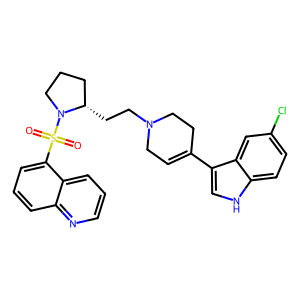

In [19]:
molecule = Chem.MolFromSmiles(train_similar)
img = Draw.MolToImage(molecule)
img.save('lohi_eda/drd2_hi_train.png')
img

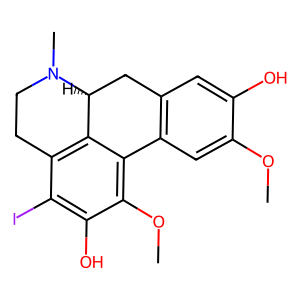

In [20]:
molecule = Chem.MolFromSmiles(test_similar)
img = Draw.MolToImage(molecule)
img.save('lohi_eda/drd2_hi_test.png')
img

# HIV-Hi

In [21]:
train = pd.read_csv('../../data/hi/hiv/train_1.csv')
test = pd.read_csv('../../data/hi/hiv/test_1.csv')

In [22]:
nearest_dist, nearest_idx = get_nearest_mols(train['smiles'], test['smiles'], return_idx=True)

[14:16:56] WARNING: not removing hydrogen atom without neighbors
[14:16:56] WARNING: not removing hydrogen atom without neighbors


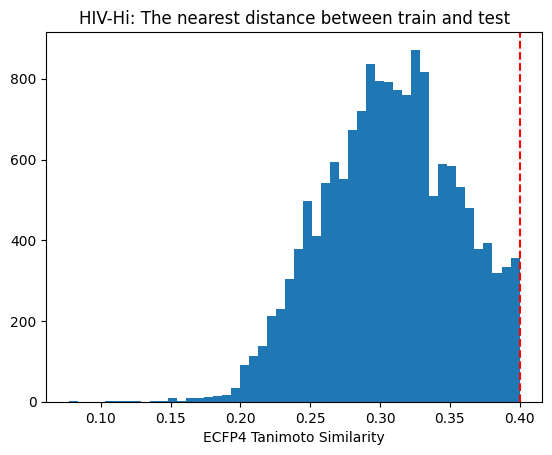

In [23]:
plt.hist(nearest_dist, bins=50)
plt.axvline(x=0.4, color = 'r', ls='--')
plt.title('HIV-Hi: The nearest distance between train and test')
plt.xlabel('ECFP4 Tanimoto Similarity')
plt.savefig('lohi_eda/hiv_hi.png')

In [24]:
similar_idx = []
for i, sim in enumerate(nearest_dist):
    if sim >= 0.40:
        similar_idx.append(i)
similar_idx

[43,
 60,
 86,
 105,
 168,
 262,
 357,
 369,
 455,
 580,
 604,
 612,
 631,
 679,
 681,
 760,
 795,
 815,
 859,
 882,
 883,
 951,
 1016,
 1231,
 1329,
 1356,
 1433,
 1437,
 1473,
 1496,
 1598,
 1601,
 1634,
 1646,
 1700,
 1836,
 1855,
 1869,
 1897,
 1923,
 1979,
 2000,
 2001,
 2003,
 2017,
 2076,
 2202,
 2254,
 2262,
 2302,
 2304,
 2338,
 2378,
 2401,
 2477,
 2536,
 2620,
 2664,
 2872,
 2924,
 2956,
 3165,
 3198,
 3317,
 3336,
 3343,
 3394,
 3488,
 3646,
 4058,
 4258,
 4364,
 4623,
 4819,
 4863,
 4922,
 4950,
 5245,
 5386,
 5499,
 5602,
 5680,
 5776,
 5902,
 6131,
 6456,
 6460,
 6596,
 6705,
 6742,
 6777,
 6781,
 6802,
 6900,
 7220,
 7226,
 7328,
 7354,
 7390,
 7458,
 7728,
 7808,
 7835,
 8044,
 8072,
 8214,
 8268,
 8429,
 8431,
 8505,
 8512,
 8513,
 8515,
 8742,
 8753,
 8802,
 8803,
 8808,
 8813,
 8835,
 9287,
 9468,
 9573,
 9581,
 10003,
 10193,
 10269,
 10489,
 10797,
 10857,
 11079,
 11109,
 11122,
 11266,
 11269,
 11438,
 11727,
 11763,
 11935,
 12011,
 12372,
 12556,
 12709,
 1272

In [25]:
# Looking for the most similar molecules
test_idx = similar_idx[0]
train_idx = nearest_idx[test_idx]

In [26]:
train_similar = train['smiles'][train_idx]
test_similar = test['smiles'][test_idx]

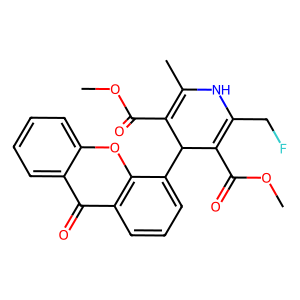

In [27]:
molecule = Chem.MolFromSmiles(train_similar)
img = Draw.MolToImage(molecule)
img.save('lohi_eda/hiv_hi_train.png')
img

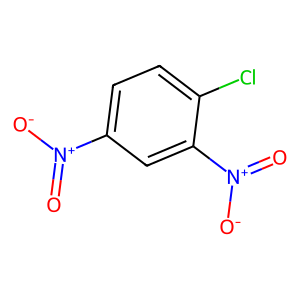

In [28]:
molecule = Chem.MolFromSmiles(test_similar)
img = Draw.MolToImage(molecule)
img.save('lohi_eda/hiv_hi_test.png')
img

# DRD2-Lo

In [3]:
train = pd.read_csv('../../data/lo/drd2/train_1.csv')
test = pd.read_csv('../../data/lo/drd2/test_1.csv')

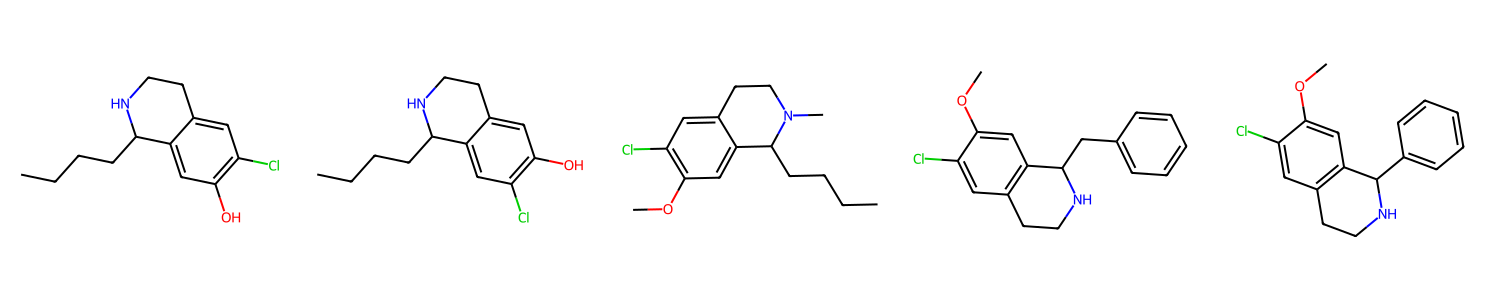

In [4]:
smiles = test[test['cluster'] == 1]['smiles'].to_list()
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles]
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 300))
img

# KCNH2-Lo

In [5]:
train = pd.read_csv('../../data/lo/kcnh2/train_1.csv')
test = pd.read_csv('../../data/lo/kcnh2/test_1.csv')

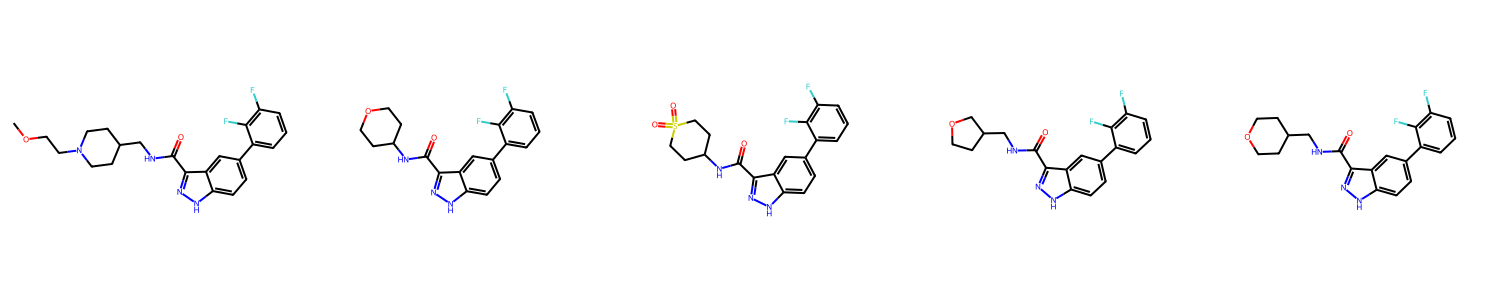

In [23]:
smiles = test[test['cluster'] == 10]['smiles'].to_list()
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles]
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 300))
img